In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload

import sys
sys.path.append("..")

### Load data

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
IMAGE_SIZE = 28
NUM_PIXELS = IMAGE_SIZE * IMAGE_SIZE
NUM_CLASSES = 10

45222-th digit:


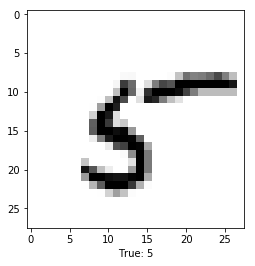

In [4]:
def plot_random():
    i = np.random.randint(X_train.shape[0])
    print("{0}-th digit:".format(i))
    plt.imshow(X_train[i].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='binary')
    plt.xlabel("True: {0}".format(y_train[i]))
    plt.show()
    
plot_random()

In [5]:
X_train = X_train[:2000]
X_test = X_test[:200]

X_train = X_train.reshape(*X_train.shape, 1).transpose(0, 3, 1, 2)
X_test = X_test.reshape(*X_test.shape, 1).transpose(0, 3, 1, 2)

X_train = X_train / 255.
X_test = X_test / 255.

X_train.shape, X_test.shape

((2000, 1, 28, 28), (200, 1, 28, 28))

In [6]:
from sklearn.preprocessing import OneHotEncoder

y_train = y_train[:2000]
y_test = y_test[:200]

ohe = OneHotEncoder(categories=[range(10)])
Y_train = ohe.fit_transform(y_train.reshape(-1, 1)).toarray()
Y_test = ohe.fit_transform(y_test.reshape(-1, 1)).toarray()

Y_train.shape

(2000, 10)

### Fit model

In [7]:
%autoreload

from src.model import Sequential
from src.layers.flatten import Flatten
from src.layers.convolution import Conv2D
from src.layers.pooling import Pool2D
from src.layers.dense import Dense
from src.layers.dropout import Dropout
from src.layers.activation import Activation
from src import activation_fns
from src.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3, 3)))
model.add(Activation(activation_fns.ReLU))
model.add(Pool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation(activation_fns.ReLU))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation(activation_fns.softmax))

model.configure(X_train.shape, Adam(0.01))
model.summary()

Layer class    Output shape                Params
-------------  ------------------  --------------
Conv2D         (None, 32, 26, 26)   320
Activation     (None, 32, 26, 26)     0
Pool2D         (None, 32, 25, 25)     0
Dropout        (None, 32, 25, 25)     0
Flatten        (None, 20000)          0
Dense          (None, 128)            2.56013e+06
Activation     (None, 128)            0
Dropout        (None, 128)            0
Dense          (None, 10)          1290
Activation     (None, 10)             0


In [8]:
costs = model.fit(X_train, Y_train, 3, batch_size=16)

### Accuracy

In [9]:
from sklearn.metrics import accuracy_score
decode = lambda x: np.argmax(x, axis=1)

y_train_pred = decode(model.predict(X_train))
print("Train:", accuracy_score(y_train, y_train_pred))
y_test_pred = decode(model.predict(X_test))
print("Test:", accuracy_score(y_test, y_test_pred))

Train: 0.9745
Test: 0.94


In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[17,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0,  2, 13,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 28,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 19,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 23,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  1,  0,  3,  0,  0,  1,  0, 16]])

80-th digit:


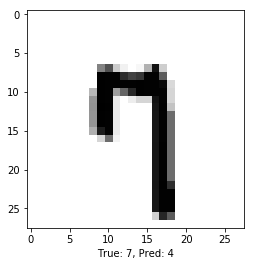

In [11]:
def plot_random_false():
    i = np.random.choice(np.where(y_test != y_test_pred)[0])
    print("{0}-th digit:".format(i))
    plt.imshow(X_test[i].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='binary')
    plt.xlabel("True: {0}, Pred: {1}".format(y_test[i], y_test_pred[i]))
    plt.show()

    
plot_random_false()

### Cost

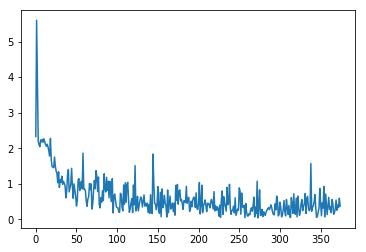

In [12]:
plt.plot(costs)
plt.show()

In [13]:
print("mean:   {0}".format(np.mean(costs)))
print("std:    {0}".format(np.std(costs)))
print("min:    {0}".format(np.min(costs)))
print("max:    {0}".format(np.max(costs)))
print("argmin: {0}".format(np.argmin(costs)))
print("argmax: {0}".format(np.argmax(costs)))

mean:   0.6287333548943939
std:    0.5733918309679841
min:    0.04279463485505049
max:    5.597586117502047
argmin: 273
argmax: 1
